In [1]:

import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class NN_Creator(nn.Module):

    def __init__(self, n_observations, n_actions,middle_1,middle_2):
        super(NN_Creator, self).__init__()
        self.layer1 = nn.Linear(n_observations, middle_1)
        self.layer2 = nn.Linear(middle_1,middle_2)
        self.layer3 = nn.Linear(middle_2, n_actions)
        self.layers = [self.layer1,self.layer2,self.layer3]
        self.input = n_observations
        self.inbetween_layer_values=[]
       

        
    
    def forward(self, x):
       
       
        # print("this is the first x:",x)
        x = F.relu(self.layer1(x))
  
        # print("this is the 2nd x sample:",x[0],"2nd part of x",x[1],"data x",x.data)
        x = F.relu(self.layer2(x))
        
        return self.layer3(x)
        
    def extractor(self, x,perdiction):
        list_of_all_values_for_x=[]
        list_of_all_values_for_x.append(x.data.cpu().detach().numpy())
        # print("this is the first x:",x)
        x = F.relu(self.layer1(x))
        list_of_all_values_for_x.append(x.data.cpu().detach().numpy())
        # print("this is the 2nd x sample:",x[0],"2nd part of x",x[1],"data x",x.data)
        x = F.relu(self.layer2(x))
        list_of_all_values_for_x.append(x.data.cpu().detach().numpy())
        final_value= self.layer3(x)
        list_of_all_values_for_x.append(final_value.data.cpu().detach().numpy())
        self.inbetween_layer_values.append([list_of_all_values_for_x,perdiction])
        return final_value
        
    

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import torchvision
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

class FlattenTransform:
    def __call__(self, img):
        return img.view(-1)  # Flattens (1, 28, 28) to (784,)

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    FlattenTransform()  # Automatically flattens images
])

# Load the MNIST training dataset
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)

# Load the MNIST test dataset
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

# Create DataLoader for batch processing
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:01<00:00, 6070748.78it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 159294.33it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:01<00:00, 1514270.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 3152495.25it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

# Example transform
transform = transforms.ToTensor()

# Load MNIST datasets
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

# DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Dict to store images per digit class
dict_of_images = {i: [] for i in range(10)}

# Efficient loop over train_loader
for images, labels in train_loader:
    dict_of_images[labels.item()].append(images)

# Efficient loop over test_loader
for images, labels in test_loader:
    dict_of_images[labels.item()].append(images)


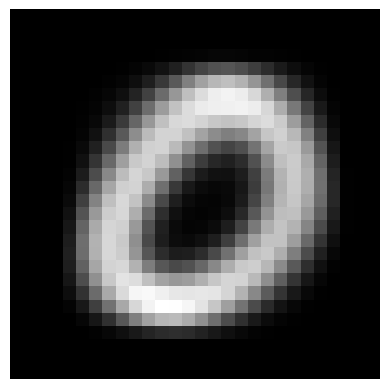

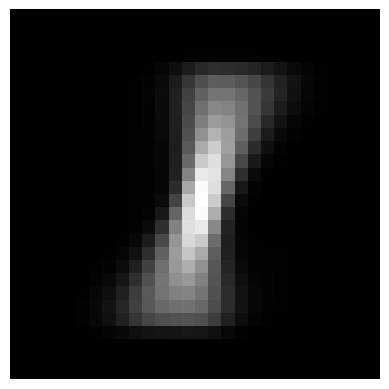

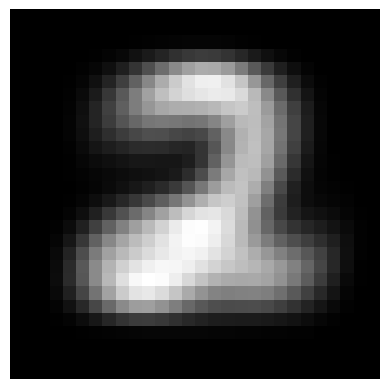

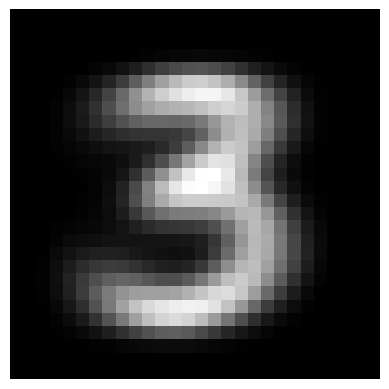

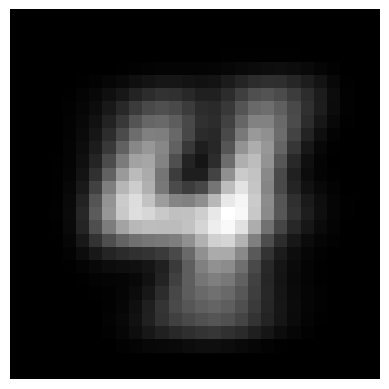

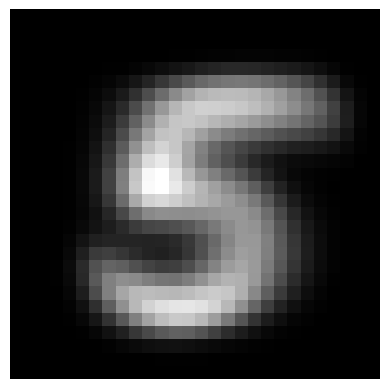

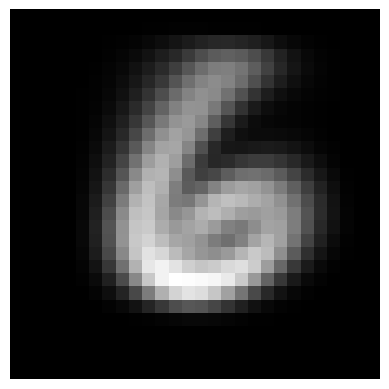

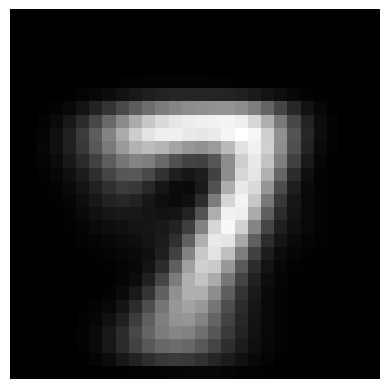

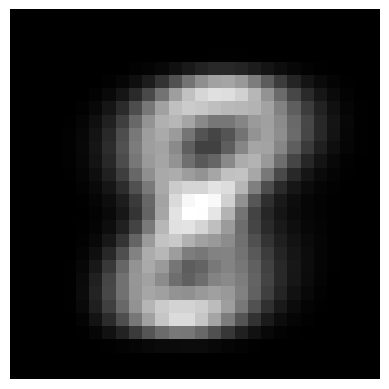

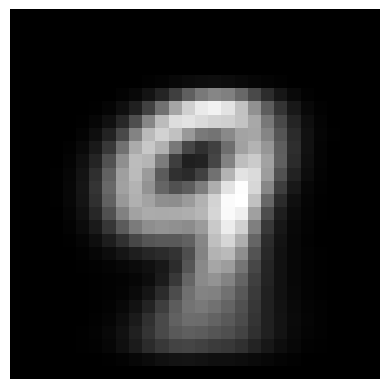

In [4]:
avg_dict = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
for lol in [0,1,2,3,4,5,6,7,8,9]:
    
    
    # average_tensor = torch.mean(torch.stack(tensor_list), dim=0)
    temp = torch.mean(torch.stack(dict_of_images[lol]), dim=0)
    avg_dict[lol] = temp
    fig = plt.figure(frameon=False)
    
    plt.imshow(temp.view(28, 28), cmap="gray")
    # plt.title(f"Label: {lol}")
    fig.patch.set_visible(False)
    plt.axis("off")
    plt.show()

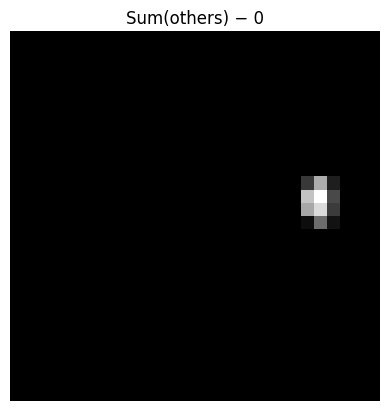

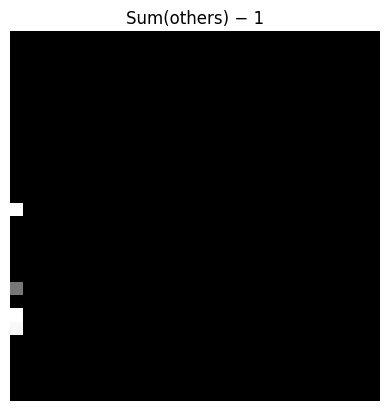

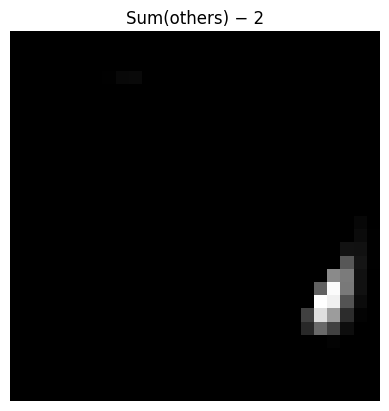

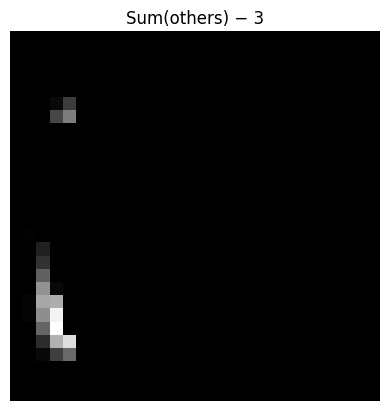

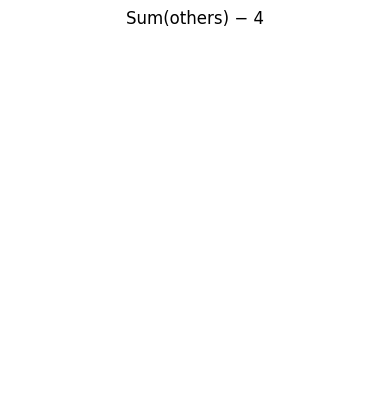

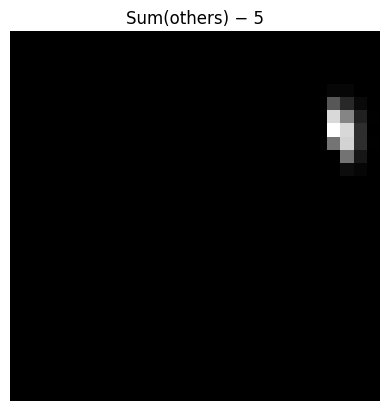

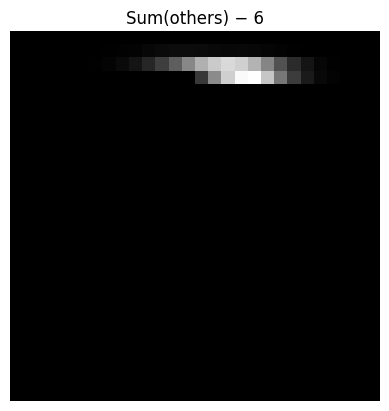

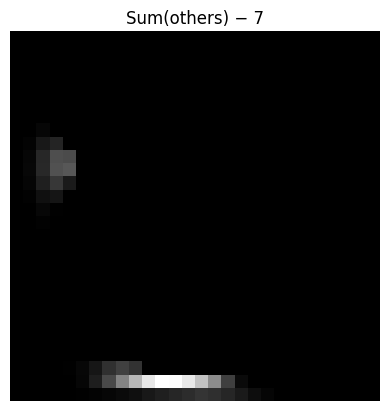

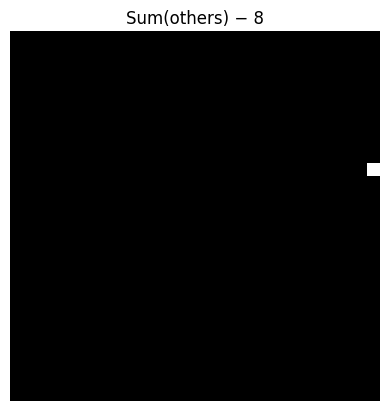

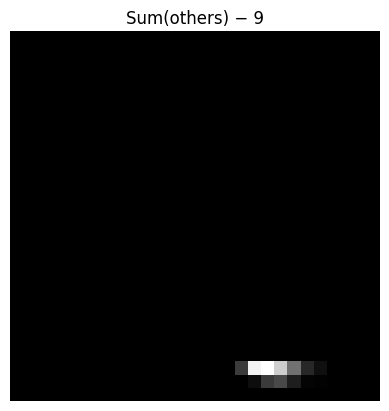

In [5]:
import torch
import matplotlib.pyplot as plt

mut_images = []

for digit in range(10):
    reference = avg_dict[digit]  # avg image of the current digit

    # Sum of all other average images
    others_sum = sum(avg_dict[i] for i in range(10) if i != digit)

    # Difference image: sum of others - current
    diff_image =  reference - others_sum 

    # Optional: Clamp and normalize for visualization
    clipped = torch.clamp(diff_image, min=0)
    x_min, x_max = clipped.min(), clipped.max()
    x_norm = (clipped - x_min) / (x_max - x_min)

    mut_images.append(x_norm)

    # Plot
    plt.figure(frameon=False)
    plt.imshow(x_norm.view(28, 28), cmap="gray")
    plt.title(f"Sum(others) − {digit}")
    plt.axis("off")
    plt.show()


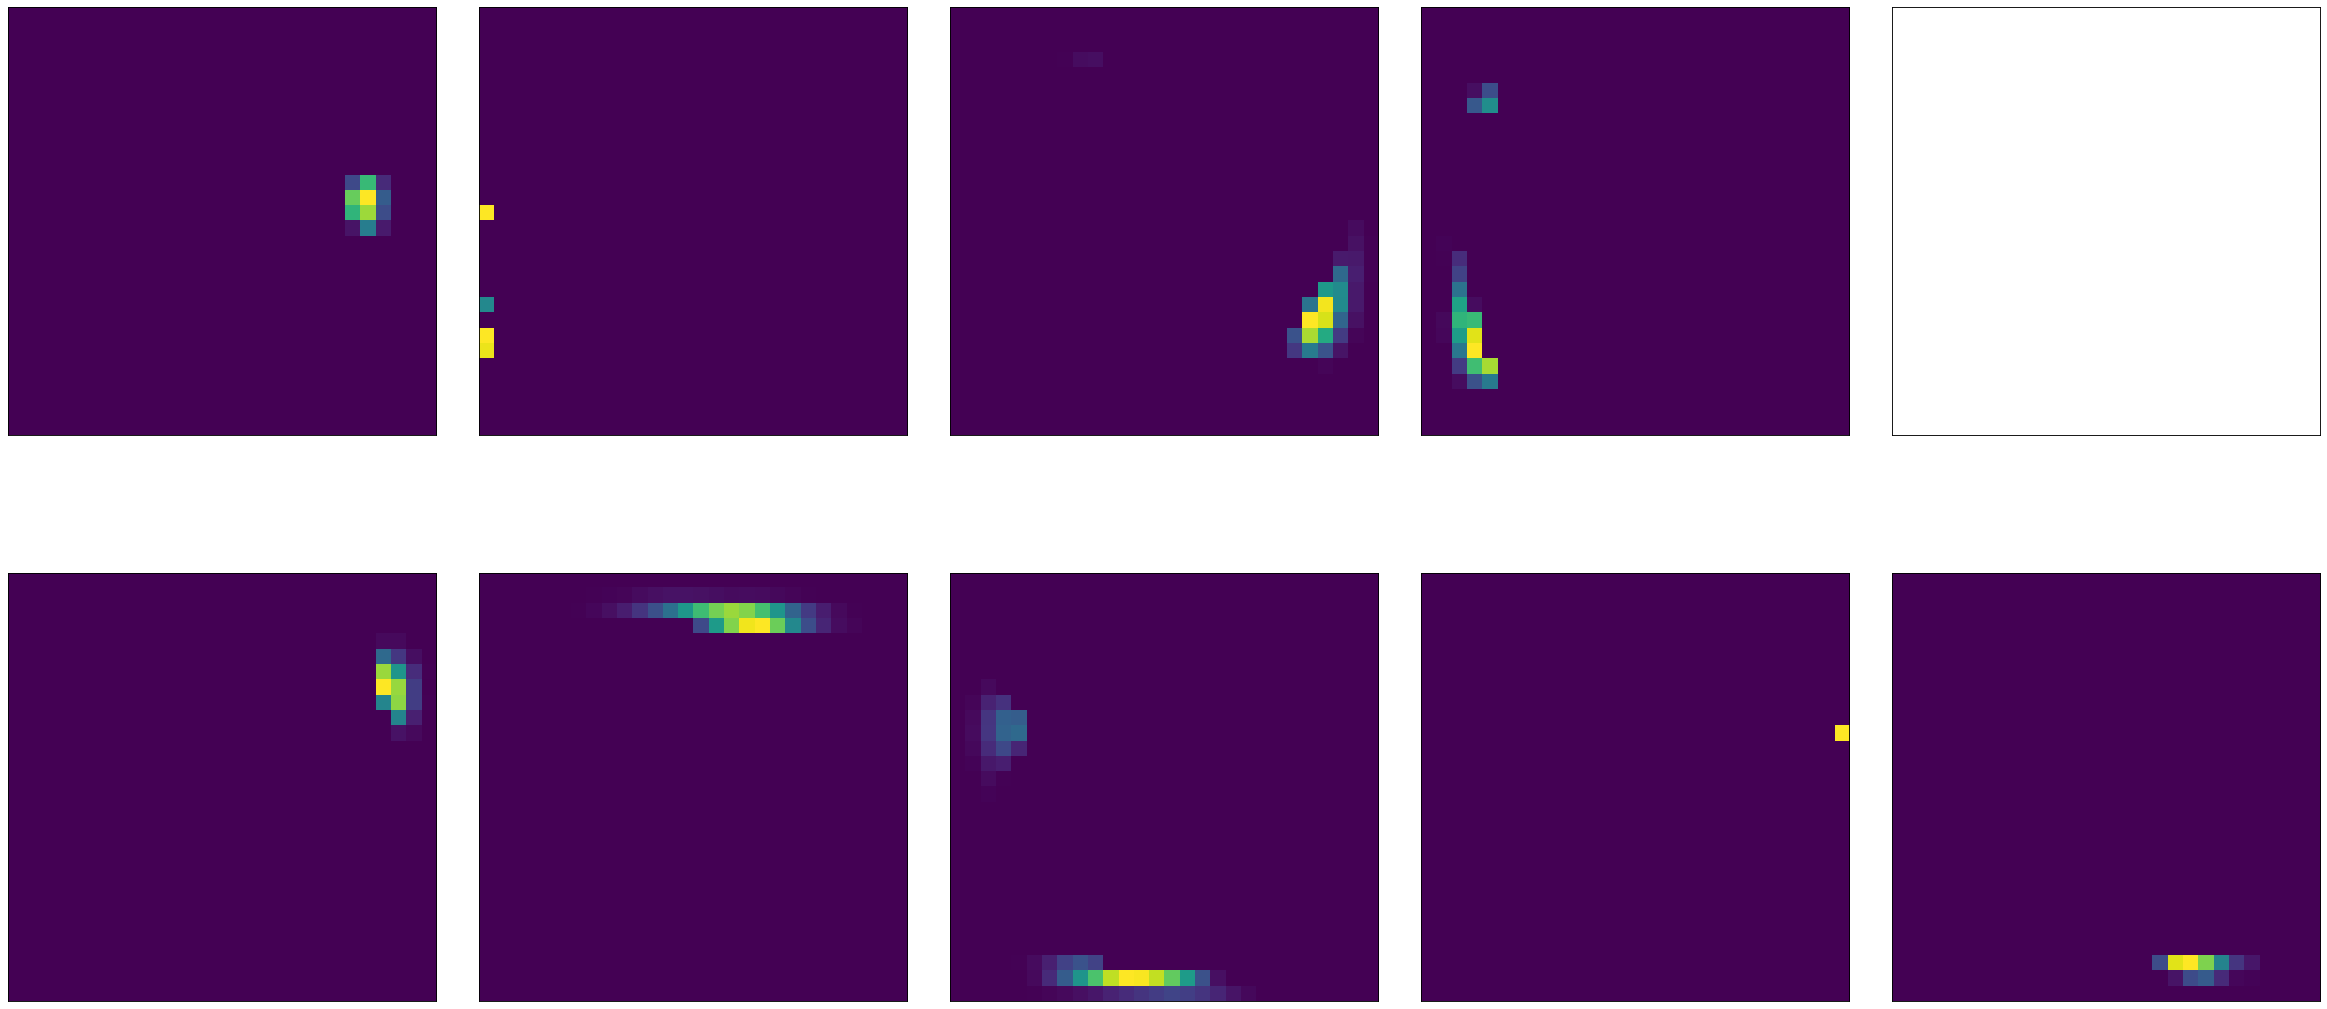

In [6]:

import numpy as np 
# asdw = torch.cat(mut_images)
# print(type(mut_images))
# print(len(mut_images))
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,figsize=(17, 15), dpi=80)
plt.subplots_adjust(left=0.3, right=2, bottom=0.1, top=1, wspace=0.1, hspace=0.1)
# ax = ax.flatten()
count=-1
for idx in [0,1]:    
 for idy in [0,1,2,3,4]:    
      count= count + 1 
      # print(count)
      ax[idx,idy].imshow(mut_images[count].view(28, 28))
      ax[idx,idy].set_xticks([])  # Remove x-axis ticks
      ax[idx,idy].set_yticks([])  # Remove y-axis ticks
      # ax.axis_x("off")
# plt.savefig('sample_image.png')
 # fig = plt.figure(frameon=False)
    
 #        plt.imshow(zzz.view(28, 28), cmap="gray")
 #        # plt.title(f"Label: {lol}")
 #        fig.patch.set_visible(False)
 #        plt.axis("off")
plt.show()

class 0


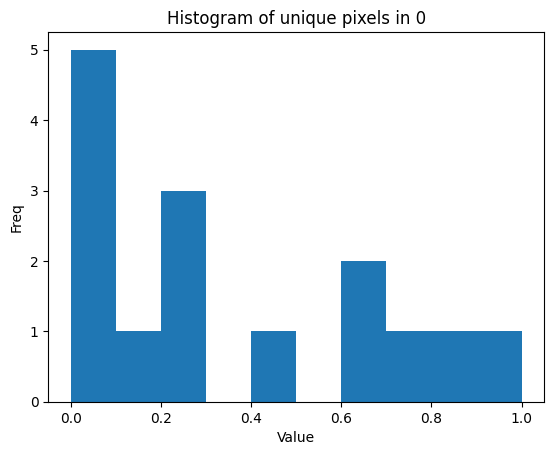

class 1


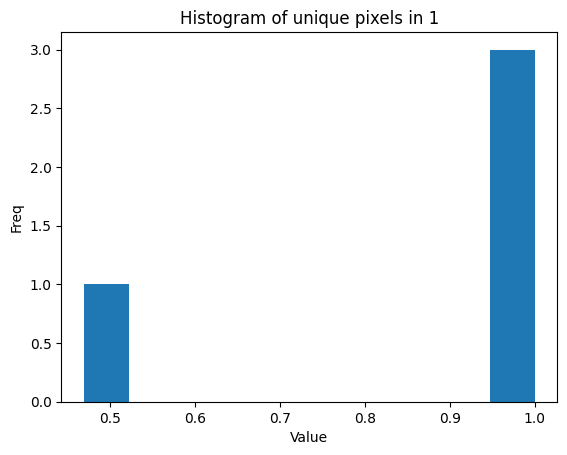

class 2


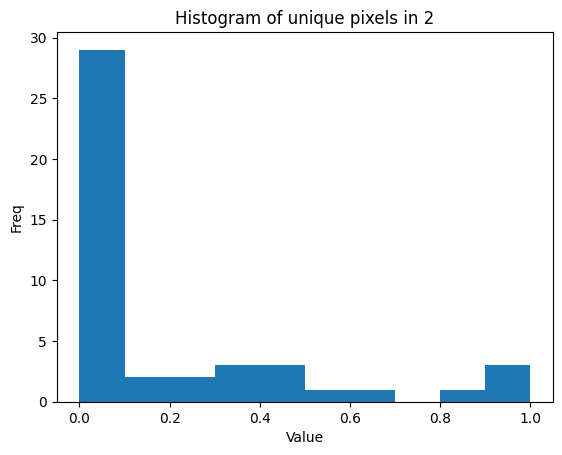

class 3


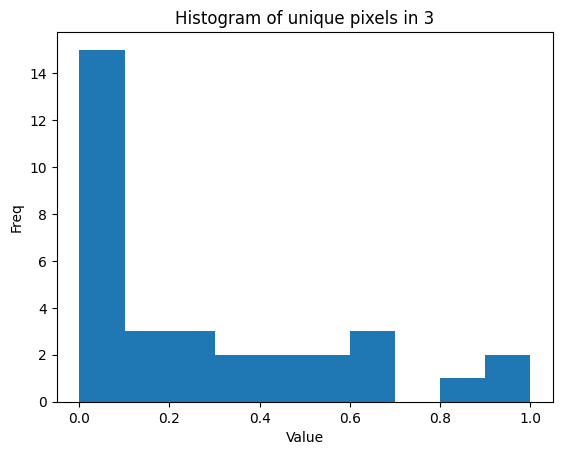

class 4


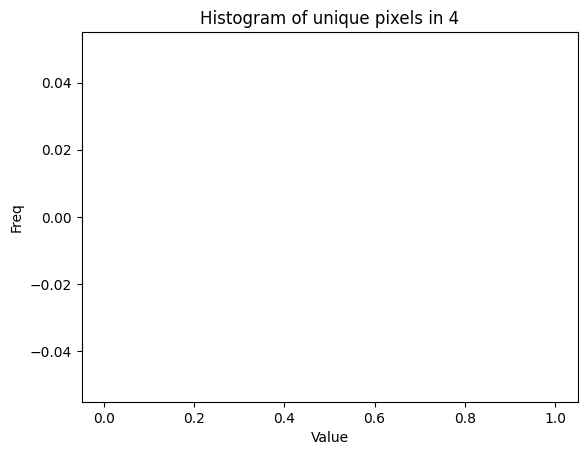

class 5


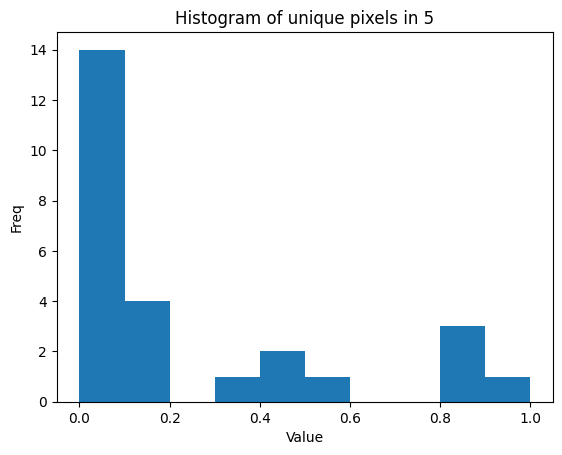

class 6


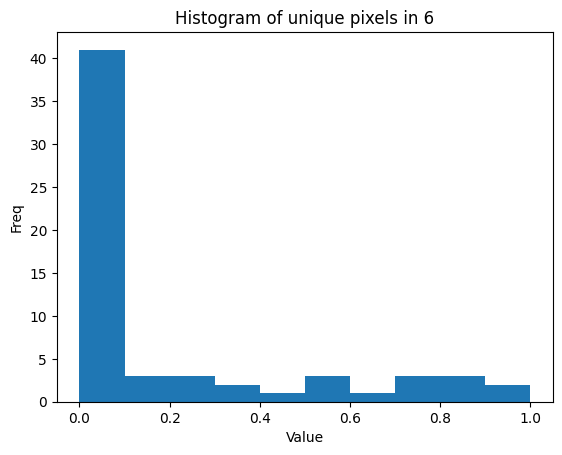

class 7


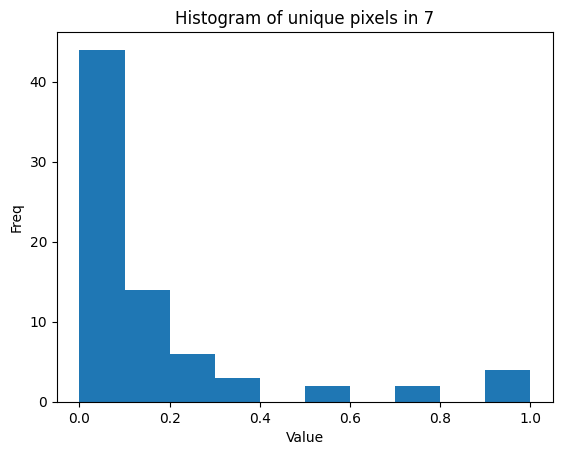

class 8


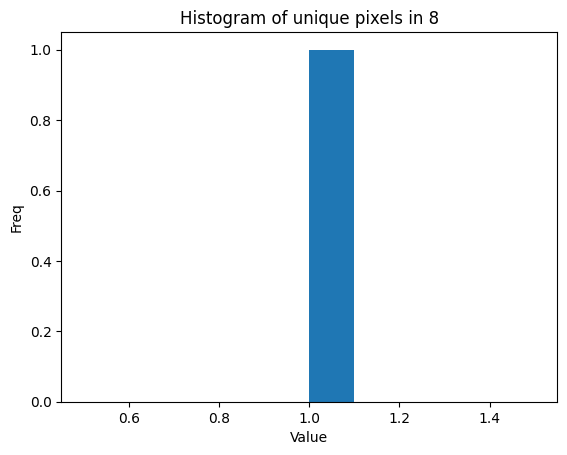

class 9


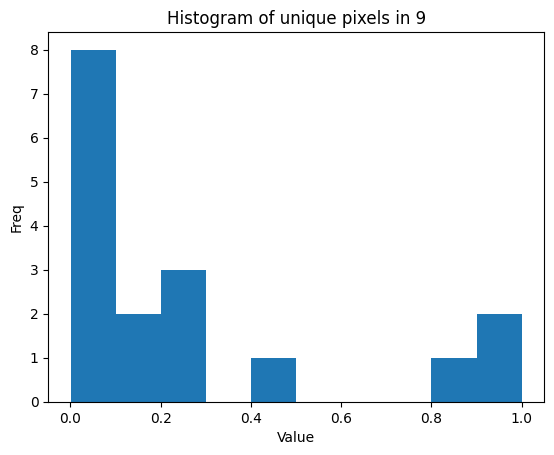

In [7]:
import pandas as pd
c_list=[]
cua=[]
cua_x=[]

# fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,figsize=(17, 15), dpi=80)
# plt.subplots_adjust(left=0.3, right=2, bottom=0.1, top=1, wspace=0.1, hspace=0.1)

for i,k in enumerate(mut_images):  
    # print(i-1)
    #TODO:ASAP HERE ADD MORE NUMBERS
    print("class",i)
    k =np.reshape(k,[28,28])
    count = 0
    cua=[]
    cua_x=[]
    for index_po,point in enumerate(k):
        for y,val in enumerate(point):
            if val>0:
                count = count +1 
                c_list.append([index_po,y,val,i])
                cua.append(val)
                cua_x.append(y)
    series = pd.Series(cua)
    summary = series.describe()
    norm = [float(ix)/sum(cua) for ix in cua]
    # ax[idx,idy].imshow(mut_images[count].view(28, 28))
    plt.hist(np.asarray(cua,dtype="float"))
    plt.title(f'Histogram of unique pixels in {i}')
    plt.xlabel('Value')
    plt.ylabel('Freq')
    plt.show()
    plt.clf()
    plt.close()
    # plt.clear()
    # print(count)

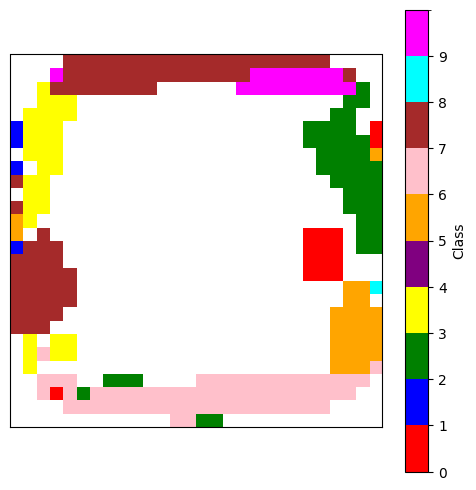

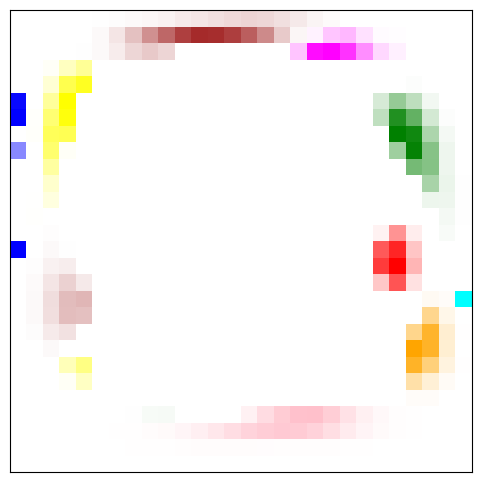

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Dummy sample data — replace with your real data
# c_list = [(x, y, size, class_label)]
# Example:
# c_list = [(1, 1, 1, 0), (2, 2, 1, 5), (3, 3, 1, 9)]
xs, ys, sizes, classes = zip(*c_list)
width = max(xs) + 1
height = max(ys) + 1

# Grid with background value -1
grid = np.full((height, width), -1)
for x, y, size, class_label in c_list:
    grid[x, y] = class_label

# 10-class colormap
colors = ['red', 'blue', 'green', 'yellow', 'purple',
          'orange', 'pink', 'brown', 'cyan', 'magenta']
cmap = ListedColormap(colors)
cmap.set_under('white')  # Background is white

# Define boundaries from 0 to 10 (10 bins for class 0–9)
boundaries = np.arange(0, 11)
norm = BoundaryNorm(boundaries, ncolors=len(colors))

# Plot
plt.figure(figsize=(6, 6))
img = plt.imshow(grid, cmap=cmap, norm=norm, interpolation='nearest')

# Colorbar for class labels
cbar = plt.colorbar(img, ticks=np.arange(10))
cbar.set_label('Class')

plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Sample c_list: (x, y, size/alpha, class_label)
# Replace this with real data
# Example: c_list = [(1, 1, 0.8, 0), (2, 2, 0.5, 5), (3, 3, 1.0, 9)]

xs, ys, alphas, class_labels = zip(*c_list)
width = max(xs) + 1
height = max(ys) + 1

# 10-class colormap
colors = ['red', 'blue', 'green', 'yellow', 'purple',
          'orange', 'pink', 'brown', 'cyan', 'magenta']
cmap = ListedColormap(colors)
rgb_colors = cmap(range(10))[:, :3]  # Get RGB only

# Create RGBA image initialized to white (background)
rgba_img = np.ones((height, width, 4))  # White background, alpha=1

# Paint class colors with transparency from size
for y, x, alpha, label in c_list:
    rgba_img[y, x, :3] = rgb_colors[label]  # RGB from colormap
    rgba_img[y, x, 3] = alpha  # Alpha from size

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(rgba_img, interpolation='nearest')

plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.show()


In [9]:
    

# again no gradients needed

def run_samples(test_data,model=None,state="",verbose=False,loop_time=0,chosen_class=[9,8,7,6,5,4,3,2,1,0]):
    classes =[9,8,7,6,5,4,3,2,1,0]
    return_list = []
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    count_for_loop = 0
    with torch.no_grad():
        for data in test_data:
            images, labels = data
            # print(int(labels))
            images = images.view(images.size(0), -1)
            if state == "steal" and count_for_loop > loop_time :
                
                outputs = model.extractor(images,labels.item())
            else:
                outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if int(labels) == prediction:
                    if len(classes)== 1:
                        correct_pred[classes[int([0])]] += 1
                    correct_pred[classes[int(labels[0])]] += 1
                    # bug under this
                
                total_pred[classes[int(labels)]] += 1
            count_for_loop = count_for_loop+1
    
    
    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        if classname in chosen_class:
            accuracy = 100 * float(correct_count) / total_pred[classname]
            print(f'{accuracy:.1f} %')
            

In [10]:
# # get some random training images
# dataiter = iter(train_loader)
# # images, labels = next(dataiter)

# # # show images
# # imshow(torchvision.utils.make_grid(images))
# image_shower(dataiter)





In [11]:
def test_acc_full_data(model,data_set):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in data_set:
            images, labels = data
            images = images.view(images.size(0), -1)
            
            # print(data)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [12]:
# run_samples(test_loader)

In [13]:
# run_samples(test_loader,state="steal",loop_time=500)

In [14]:
# # # def hook_fn(module, input, output):
# # #     activations[module] = output.detach().numpy()

# # print("ASSUMED X INPUT:")

# # print(sampler9000.inbetween_layer_values[0][0])
# # print(len(sampler9000.inbetween_layer_values[0][0]))
# # # print("ASSUMED Y TARGET:")
# # # print(sampler9000.inbetween_layer_values[0][1])
# # # _, predictions = torch.max(outputs, 1)
# # # print(len(sampler9000.inbetween_layer_values[0][1][0]))
# # # print("PERD")
# # # print(torch.max(torch.from_numpy(sampler9000.inbetween_layer_values[0][1]), 1))

# # print(torch.max(torch.from_numpy(sampler9000.inbetween_layer_values[0][1]), 1))


# # #our four perdictions inputs = sampler9000.inbetween_layer_values[0][0]
# # # our four perdictions = torch.max(torch.from_numpy(sampler9000.inbetween_layer_values[0][1]), 1)

# #     # print(_,predictions[ani])
# # print(len(sampler9000.inbetween_layer_values))
# print("amount of data points",len(sampler9000.inbetween_layer_values))
# binary_matrix =[]
# temp=[]
# image_list = []
# images_list = []

# # print(len(sampler9000.inbetween_layer_values[0]))

# print(len(sampler9000.inbetween_layer_values[0]))


# print(sampler9000.inbetween_layer_values[0][1])# perdiction
# #
# #
# # This is some info, for now we see that the first 
# #  sampler9000.inbetween_layer_values[sample index ][layer index][element index]
# #

# print(sampler9000.inbetween_layer_values[0][0][1][0]) # 
# print(sampler9000.inbetween_layer_values[0][0][2][0]) # 
# print(sampler9000.inbetween_layer_values[0][0][3][0]) #
# # print(sampler9000.inbetween_layer_values[0]) 

# # print(len(sampler9000.inbetween_layer_values[0][1][0])) #
# # print(len(sampler9000.inbetween_layer_values[0][2][0])) #

# # plt.imshow(torch.tensor(sampler9000.inbetween_layer_values[0][0][0]).view(28, 28), cmap="gray")
# # plt.title(f"Label: {labels}")
# # plt.axis("off")
# # plt.show()

# # for sample in 
# # print(len(sampler9000.inbetween_layer_values[0]))
# # print(sampler9000.inbetween_layer_values[0][0][0])


# # print(binary_matrix[1])
# # print(binary_matrix[0][0])

# # print(len(binary_matrix[0][0]))
# # print(len(binary_matrix[1][0]))
# # print(binary_matrix[0][0])
# # print(len(sampler9000.inbetween_layer_values[1][1][3]))
# # print([sampler9000.inbetween_layer_values[1][0][0],torch.max(torch.from_numpy(sample[1]), 1)[1][0]])

In [15]:

# # barcode_graph
# figure('pos',[100,300,640,150])


# [r,c] = find(A);
# Y = bsxfun(@minus,r,[.5,-.5,-.5, .5]);
# X = bsxfun(@minus,c,[.5, .5,-.5,-.5]);


# patch(X,Y,ones(size(X)),'EdgeColor','none','FaceColor','k');

# set(gca,'pos',[0.05,0.05,.9,.9],'ylim',[0.5 6.5],'xlim',[0.5 1000.5],'xtick',[],'ytick',1:6,'ydir','reverse')


# c = kmeans(A,3,'distance','hamming');


# nc   = numel(c);
# h    = text(repmat(1010,nc,1),1:nc,reshape(sprintf('%3d',c),3,numel(c)));
# cmap = hsv(max(c));
# set(h,{'Background'},num2cell(cmap(c,:),2))

In [16]:
# print(sampler9000.inbetween_layer_values[0][1]) # perdiction 
# print(sampler9000.inbetween_layer_values[0][0][1][0]) # the nodes

In [17]:
# import copy 
# dic_of_nodes_l1={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
# dic_of_nodes_l2={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
# for entry in sampler9000.inbetween_layer_values[5000:]:
#     # dic_of_nodes[entry[1]].append()
    
#     dic_of_nodes_l1[entry[1]].append(entry[0][1])
#     dic_of_nodes_l2[entry[1]].append(entry[0][2])


In [18]:
# sdf=[2,3,4,5,6,7,8]
# for frlo in sdf[10:]:
#     print(frlo)

# print(dic_of_nodes_l2[entry[1]][5][0])

In [19]:
# import matplotlib as mpl
# # import matplotlib.pyplot as plt
# # import matplotlib as mpl
# # layer_list = [[],[],[],[]]#store all layer inputs here 
# # binary_matrix  =[sampler9000.inbetween_layer_values[0]]
# # # print(len(binary_matrix[0][0][0]))
# # for image in (binary_matrix):
# #     for layer in binary_matrix:
# #         for nodes in layer:
# #             for index,node in enumerate(nodes):
# #                   print(index)
# #                   print("OK")
# #                   layer_list[index].append(node)

# # fix this function 
# #reive the past to see more detail 
# # Past me forgive me for my feigned sight 




# # # print(len(binary_matrix[0][0][0]))
# # # print(len(layer_list[0]))
# # print(len(layer_list))
# # print(layer_list)
# # print(len(layer_list[0][0])) ### TODO: TAKE THIS LIST AND ZIP IT 
# # print(len(layer_list[1][0])) #stright values
# # print("DIFF")
# # x= layer_list[0][0]

# # # [list(a) for a in zip(layer_list[0])]
# # # print(layer_list[0])
# # print("Laaaaaaaaaaaaaaaaaaaaaaaaaaaa")
# # # z=[list(a) for a in zip(layer_list[0])]
# # # z= list(zip(x, y))
# # # print(len(z))
# # # print(z)


# # iterables=[sampler9000.inbetween_layer_values[0][0][1][0],
# #            sampler9000.inbetween_layer_values[1][0][1][0],
# #           sampler9000.inbetween_layer_values[2][0][1][0],
# #            sampler9000.inbetween_layer_values[3][0][1][0]
# #           ]

# # # print(z)
# # for triple in zip(*iterables):
# #     print(triple)
# # print(list(zip(*iterables)))

# # def custom_NN_spliter(layer_list):
# #     #split each layer to an element in this order
# #     # [a,b,c]
# #     # a,ab,b,bc,c

# #     return 


# def basic_pattern_recon(oberserved_list,_type_of_pattern="once",silent_=False):
#     #find a better way to visulize binary data
#     # https://github.com/codilime/veles
#     # https://stackoverflow.com/questions/17218549/how-to-visualize-binary-data
#     #make this way more dyanmic 
#     # make this take X amount of lists and take all elements overlapping and conviluition type methods
#     # like if given 3 it tries [[1-2],[2-3],[1-2-3]]
#     # up to infinite length of it and even certain aspects 
#     # allow a heat map that looks nicer on the eyes 

#     #make nicer function for the if statement in type of patter just to make it look nicer :)

    
#     #make output : average , highest , lowest of indexs 
#     # print("OBSERVED LIST LEN ", len(oberserved_list))

#     #this function should return all nodes were we see the pattern between each layer and each layer 
    
    
#     for _List in oberserved_list:
#         most_list=[]
        
#         # modular method of processing 
#         if _type_of_pattern == "avg":
#             for i,k in enumerate(_List):
#                 print(k)
#                 if k > 0.5:
#                     most_list.append(1)
#                 else:
#                     most_list.append(0)
    
#         if _type_of_pattern == "once":
#             for i,k in enumerate(_List):
#                 if k > 0:
#                     most_list.append(1)
#                 else:
#                     most_list.append(0)
#         if not silent_:
#             # print(most_list)
#             fig, ax = plt.subplots(figsize=(10, 1))  # Change (10,1) if you prefer horizontal
            
#             # Define colormap
#             # cmap = mpl.colors.ListedColormap(['r', 'k'])
#             # bounds = [0., 0.5, 1.]
#             # norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
            
#             # # Plot the data
#             # ax.imshow(most_list, interpolation='none', cmap=cmap, norm=norm)
#             plt.pcolormesh([most_list]*2, cmap='Greys', shading='flat')
#             plt.show()
#             # Fix aspect ratio
#             ax.set_aspect('auto')
            
#             # Hide axes
#             ax.set_xticks([])
#             ax.set_yticks([])
            
#             plt.show()
#     return most_list
    
    
# # print(list(zip(*iterables)))

# saftey_net = [(0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.06004797, 0.1166677), (0.0, 0.12170439, 0.0, -0.1283866),
#               (0.0, 0.022650775, 0.17870834, 0.18514189), (0.0, 0.20133187, 0.2535953, -0.05267809), (0.0, 0.0, 0.13077697, 0.2828388),
#               (0.0, 0.0, 0.0, 0.0861055), (0.0, 0.11296421, 0.19403198, 0.26478332), (0.0, 0.0, 0.0, -0.19244795),
#               (0.0, 4, 4, 4)]
# # test_l = basic_pattern_recon(saftey_net,_type_of_pattern="once")
# # print("test_l= ",test_l)


# test_2 = basic_pattern_recon(iterables,_type_of_pattern="once")
# print(test_2)

# # sample_list = []
# # for sample in sampler9000.inbetween_layer_values:
# #     # print(sample[1][1])
# #     for index_2nd in [0,1,2,3]:
# #         sample_list.append([sample[0][index_2nd],torch.max(torch.from_numpy(sample[1]), 1)[1][index_2nd]])
# # # sampler9000.forward(torch.Tensor([2,2]))hiszxcdsi
# # https://stackoverflow.com/questions/28517400/matplotlib-binary-heat-plot
# # https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

We have an extraction method from index to node but than what? how do we deal with all the relational weights ????? pool them? the 

In [20]:

def muilt_simple(a,b):
    new_a=[]
    new_b=[]
    returning_list = []
    for k in a:
        if k>0:
            new_a.append(1)
        else:
            new_a.append(0)
    for k in b:
        if k>0:
            new_b.append(1)
        else:
            new_b.append(0)
    for k in range(0,len(new_b)-1):
        returning_list.append(new_a[k]*new_b[k])
    return returning_list


In [21]:
import copy 
dic_of_nodes={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}

In [22]:
seeds=[3,123,509,12390,58921,12390,94213]

In [23]:
def set_nth_element_to_x(arrs,change_to,index):
    for arr in arrs:
        arr[index]=change_to
        

In [24]:
def modifiy_NN(models,z,c):
    with torch.no_grad():
        for nn_index,nn in models.items():
            
   
            
            if (len(z[nn_index]) >0):
                try:
                    nn=nn[0]
                except:
                    a=0
                
       
                b1=[1 if x < 0.1 else 0 for x in z[nn_index][0][0]]
                b2=[1 if x < 0.1 else 0 for x in c[nn_index][0][0]]
                test_2 = muilt_simple(b1,b2)

                
                for index,node in enumerate(test_2): 
                    if node ==0:
                       
                        set_nth_element_to_x(nn.layer2.weight,0,index)
                    
                    
                        nn.layer1.bias[index] = nn.layer1.bias[index]/10
        

In [25]:

def testing_all_nns_on_all_data(dic_of_nnns_):
    for nn_index,nn in dic_of_nnns_.items():
        try:
            nn=nn[0]
        except:
            a=0
        correct = 0
        total = 0

        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                images = images.view(images.size(0), -1)
                
               
                outputs = nn(images)
               
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
  
        run_samples(test_loader,nn,chosen_class=[nn_index])
        


In [26]:
import copy 
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import random 
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

def image_shower(dataiter):
    images, labels = next(dataiter)
    plt.imshow(images.view(28, 28), cmap="gray")
    plt.title(f"Label: {labels}")
    plt.axis("off")
    plt.show()


class FlattenTransform:
    def __call__(self, img):
        return img.view(-1)  # Flattens (1, 28, 28) to (784,)

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    FlattenTransform()  # Automatically flattens images
])


# Load the MNIST training dataset
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)

# Load the MNIST test dataset
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

# Create DataLoader for batch processing 
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Example: Get a batch of images and labels
images, labels = next(iter(train_loader))



def entire_test_function(seed,test_loader,train_oader,middle_1=10,middle_2=10,depth_in_taking=500):
    sampler9000= NN_Creator(784,10,middle_1,middle_2)
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(sampler9000.parameters(), lr=0.001, momentum=0.9)
    train_upper_limit = 10000
    for epoch in range(2):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.view(inputs.size(0), -1)  # Flatten inputs
    
            # zero the parameter gradients
            optimizer.zero_grad()
    
            # forward + backward + optimize
            outputs = sampler9000(inputs)
            # print("Output shape:", outputs.shape)  # Should be (batch_size, num_classes)
            # print("Target shape:", labels.shape)  # Should be (batch_size,)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0
            if i > train_upper_limit:
                break
    
    print('Finished Training')
    
    
    run_samples(test_loader,sampler9000,state="steal",loop_time=depth_in_taking)
    test_acc_full_data(sampler9000,test_loader)
    dic_of_nnns={0:copy.deepcopy(sampler9000),1:[copy.deepcopy(sampler9000)],
              2:[copy.deepcopy(sampler9000)],3:[copy.deepcopy(sampler9000)],
              4:[copy.deepcopy(sampler9000)],5:[copy.deepcopy(sampler9000)],
              6:[copy.deepcopy(sampler9000)],7:[copy.deepcopy(sampler9000)],
              8:[copy.deepcopy(sampler9000)],9:[copy.deepcopy(sampler9000)]}

    
    dic_of_nodes_l1={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
    dic_of_nodes_l2={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
    for entry in sampler9000.inbetween_layer_values[5000:]:
        # dic_of_nodes[entry[1]].append()
        
        dic_of_nodes_l1[entry[1]].append(entry[0][1])
        dic_of_nodes_l2[entry[1]].append(entry[0][2])



    
    modifiy_NN(dic_of_nnns,dic_of_nodes_l1,dic_of_nodes_l2)
    testing_all_nns_on_all_data(dic_of_nnns) 

In [27]:
# test vs random

In [28]:
entire_test_function(239,test_loader,train_loader,10,10,500)

[1,  2000] loss: 1.692
[1,  4000] loss: 0.698
[1,  6000] loss: 0.530
[1,  8000] loss: 0.504
[1, 10000] loss: 0.513
[2,  2000] loss: 0.491
[2,  4000] loss: 0.507
[2,  6000] loss: 0.438
[2,  8000] loss: 0.394
[2, 10000] loss: 0.425
Finished Training
90.5 %
98.4 %
86.3 %
81.9 %
95.3 %
84.8 %
96.7 %
85.8 %
85.4 %
82.7 %
Accuracy of the network on the 10000 test images: 88 %
13.7 %
86.0 %
0.0 %
0.0 %
0.0 %
0.0 %
82.5 %
4.2 %
99.6 %
0.0 %


In [29]:
entire_test_function(239,test_loader,train_loader,50,50,500)

[1,  2000] loss: 1.335
[1,  4000] loss: 0.554
[1,  6000] loss: 0.399
[1,  8000] loss: 0.373
[1, 10000] loss: 0.375
[2,  2000] loss: 0.324
[2,  4000] loss: 0.339
[2,  6000] loss: 0.292
[2,  8000] loss: 0.256
[2, 10000] loss: 0.281
Finished Training
93.7 %
98.1 %
89.6 %
88.1 %
95.8 %
93.4 %
96.5 %
90.8 %
95.1 %
90.6 %
Accuracy of the network on the 10000 test images: 93 %
72.1 %
7.8 %
64.3 %
72.1 %
96.1 %
60.6 %
68.8 %
66.6 %
95.9 %
90.9 %


In [30]:
entire_test_function(239,test_loader,train_loader,200,200,500)

[1,  2000] loss: 1.243
[1,  4000] loss: 0.511
[1,  6000] loss: 0.375
[1,  8000] loss: 0.333
[1, 10000] loss: 0.340
[2,  2000] loss: 0.286
[2,  4000] loss: 0.285
[2,  6000] loss: 0.258
[2,  8000] loss: 0.208
[2, 10000] loss: 0.217
Finished Training
91.7 %
98.5 %
93.0 %
91.9 %
96.2 %
95.9 %
97.8 %
92.3 %
93.5 %
90.1 %
Accuracy of the network on the 10000 test images: 94 %
49.0 %
75.9 %
80.6 %
95.9 %
94.8 %
94.5 %
95.9 %
78.6 %
94.4 %
77.2 %


In [31]:
entire_test_function(239,test_loader,train_loader,50,50,250)

[1,  2000] loss: 1.335
[1,  4000] loss: 0.554
[1,  6000] loss: 0.399
[1,  8000] loss: 0.373
[1, 10000] loss: 0.375
[2,  2000] loss: 0.324
[2,  4000] loss: 0.339
[2,  6000] loss: 0.292
[2,  8000] loss: 0.256
[2, 10000] loss: 0.281
Finished Training
93.7 %
98.1 %
89.6 %
88.1 %
95.8 %
93.4 %
96.5 %
90.8 %
95.1 %
90.6 %
Accuracy of the network on the 10000 test images: 93 %
94.8 %
0.0 %
92.9 %
87.5 %
65.4 %
29.4 %
71.0 %
82.7 %
46.0 %
0.3 %


In [32]:
entire_test_function(239,test_loader,train_loader,10,10,250)

[1,  2000] loss: 1.484
[1,  4000] loss: 0.742
[1,  6000] loss: 0.556
[1,  8000] loss: 0.528
[1, 10000] loss: 0.510
[2,  2000] loss: 0.480
[2,  4000] loss: 0.496
[2,  6000] loss: 0.448
[2,  8000] loss: 0.387
[2, 10000] loss: 0.423
Finished Training
95.3 %
98.7 %
86.1 %
88.8 %
81.9 %
79.7 %
97.4 %
83.4 %
77.9 %
90.1 %
Accuracy of the network on the 10000 test images: 88 %
84.8 %
96.7 %
0.0 %
92.1 %
32.8 %
0.3 %
95.0 %
13.8 %
99.1 %
0.0 %


In [33]:
entire_test_function(239,test_loader,train_loader,200,200,250)

[1,  2000] loss: 1.243
[1,  4000] loss: 0.511
[1,  6000] loss: 0.375
[1,  8000] loss: 0.333
[1, 10000] loss: 0.340
[2,  2000] loss: 0.286
[2,  4000] loss: 0.285
[2,  6000] loss: 0.258
[2,  8000] loss: 0.208
[2, 10000] loss: 0.217
Finished Training
91.7 %
98.5 %
93.0 %
91.9 %
96.2 %
95.9 %
97.8 %
92.3 %
93.5 %
90.1 %
Accuracy of the network on the 10000 test images: 94 %
95.1 %
49.1 %
87.7 %
97.1 %
87.7 %
96.8 %
96.3 %
80.1 %
98.4 %
91.6 %


In [34]:
entire_test_function(239,test_loader,train_loader,200,200,100)

[1,  2000] loss: 1.243
[1,  4000] loss: 0.511
[1,  6000] loss: 0.375
[1,  8000] loss: 0.333
[1, 10000] loss: 0.340
[2,  2000] loss: 0.286
[2,  4000] loss: 0.285
[2,  6000] loss: 0.258
[2,  8000] loss: 0.208
[2, 10000] loss: 0.217
Finished Training
91.7 %
98.5 %
93.0 %
91.9 %
96.2 %
95.9 %
97.8 %
92.3 %
93.5 %
90.1 %
Accuracy of the network on the 10000 test images: 94 %
86.2 %
20.3 %
67.2 %
94.6 %
77.2 %
92.3 %
95.4 %
84.7 %
96.1 %
83.7 %


In [35]:
entire_test_function(239,test_loader,train_loader,50,50,100)

[1,  2000] loss: 1.335
[1,  4000] loss: 0.554
[1,  6000] loss: 0.399
[1,  8000] loss: 0.373
[1, 10000] loss: 0.375
[2,  2000] loss: 0.324
[2,  4000] loss: 0.339
[2,  6000] loss: 0.292
[2,  8000] loss: 0.256
[2, 10000] loss: 0.281
Finished Training
93.7 %
98.1 %
89.6 %
88.1 %
95.8 %
93.4 %
96.5 %
90.8 %
95.1 %
90.6 %
Accuracy of the network on the 10000 test images: 93 %
97.8 %
0.0 %
63.3 %
68.0 %
65.0 %
5.2 %
73.5 %
64.3 %
99.1 %
0.0 %


In [36]:
entire_test_function(239,test_loader,train_loader,10,10,100)

[1,  2000] loss: 1.484
[1,  4000] loss: 0.742
[1,  6000] loss: 0.556
[1,  8000] loss: 0.528
[1, 10000] loss: 0.510
[2,  2000] loss: 0.480
[2,  4000] loss: 0.496
[2,  6000] loss: 0.448
[2,  8000] loss: 0.387
[2, 10000] loss: 0.423
Finished Training
95.3 %
98.7 %
86.1 %
88.8 %
81.9 %
79.7 %
97.4 %
83.4 %
77.9 %
90.1 %
Accuracy of the network on the 10000 test images: 88 %
82.6 %
2.0 %
0.0 %
1.3 %
10.7 %
0.0 %
93.4 %
11.0 %
0.0 %
0.0 %


In [37]:
entire_test_function(239,test_loader,train_loader,200,200,1000)

[1,  2000] loss: 1.243
[1,  4000] loss: 0.511
[1,  6000] loss: 0.375
[1,  8000] loss: 0.333
[1, 10000] loss: 0.340
[2,  2000] loss: 0.286
[2,  4000] loss: 0.285
[2,  6000] loss: 0.258
[2,  8000] loss: 0.208
[2, 10000] loss: 0.217
Finished Training
91.7 %
98.5 %
93.0 %
91.9 %
96.2 %
95.9 %
97.8 %
92.3 %
93.5 %
90.1 %
Accuracy of the network on the 10000 test images: 94 %
65.0 %
38.0 %
85.2 %
93.3 %
95.7 %
98.9 %
89.2 %
89.9 %
89.9 %
85.7 %


In [38]:
entire_test_function(239,test_loader,train_loader,10,10,1000)

[1,  2000] loss: 1.484
[1,  4000] loss: 0.742
[1,  6000] loss: 0.556
[1,  8000] loss: 0.528
[1, 10000] loss: 0.510
[2,  2000] loss: 0.480
[2,  4000] loss: 0.496
[2,  6000] loss: 0.448
[2,  8000] loss: 0.387
[2, 10000] loss: 0.423
Finished Training
95.3 %
98.7 %
86.1 %
88.8 %
81.9 %
79.7 %
97.4 %
83.4 %
77.9 %
90.1 %
Accuracy of the network on the 10000 test images: 88 %
0.0 %
0.0 %
69.4 %
92.1 %
37.1 %
0.0 %
97.9 %
24.5 %
0.0 %
0.0 %


In [39]:
entire_test_function(239,test_loader,train_loader,50,50,1000)

[1,  2000] loss: 1.335
[1,  4000] loss: 0.554
[1,  6000] loss: 0.399
[1,  8000] loss: 0.373
[1, 10000] loss: 0.375
[2,  2000] loss: 0.324
[2,  4000] loss: 0.339
[2,  6000] loss: 0.292
[2,  8000] loss: 0.256
[2, 10000] loss: 0.281
Finished Training
93.7 %
98.1 %
89.6 %
88.1 %
95.8 %
93.4 %
96.5 %
90.8 %
95.1 %
90.6 %
Accuracy of the network on the 10000 test images: 93 %
85.0 %
0.0 %
86.9 %
79.1 %
94.6 %
68.8 %
4.3 %
81.7 %
98.4 %
93.7 %


In [ ]:

entire_test_function(1111111111,test_loader,train_loader,10,10,500)
entire_test_function(1111111111,test_loader,train_loader,50,50,500)
entire_test_function(1111111111,test_loader,train_loader,200,200,500)
entire_test_function(1111111111,test_loader,train_loader,50,50,250)
entire_test_function(1111111111,test_loader,train_loader,10,10,250)
entire_test_function(1111111111,test_loader,train_loader,200,200,250)
entire_test_function(1111111111,test_loader,train_loader,200,200,250)
entire_test_function(1111111111,test_loader,train_loader,50,50,100)
entire_test_function(1111111111,test_loader,train_loader,10,10,100)
entire_test_function(1111111111,test_loader,train_loader,200,200,1000)
entire_test_function(1111111111,test_loader,train_loader,10,10,1000)
entire_test_function(1111111111,test_loader,train_loader,50,50,1000)

[1,  2000] loss: 1.466
[1,  4000] loss: 0.759
[1,  6000] loss: 0.566
[1,  8000] loss: 0.505
[1, 10000] loss: 0.504
[2,  2000] loss: 0.487
[2,  4000] loss: 0.430
[2,  6000] loss: 0.389
[2,  8000] loss: 0.402
[2, 10000] loss: 0.414
Finished Training
95.4 %
98.6 %
89.5 %
91.2 %
90.7 %
77.1 %
92.6 %
90.5 %
84.8 %
86.2 %
Accuracy of the network on the 10000 test images: 89 %
0.0 %
0.1 %
86.7 %
0.0 %
1.5 %
6.9 %
90.6 %
64.1 %
24.9 %
0.0 %
[1,  2000] loss: 1.229
[1,  4000] loss: 0.542
[1,  6000] loss: 0.441
[1,  8000] loss: 0.359
[1, 10000] loss: 0.357
[2,  2000] loss: 0.346
[2,  4000] loss: 0.265
[2,  6000] loss: 0.263
[2,  8000] loss: 0.237
[2, 10000] loss: 0.275
Finished Training
96.4 %
98.9 %
95.9 %
92.4 %
93.0 %
91.4 %
93.5 %
89.6 %
93.1 %
91.7 %
Accuracy of the network on the 10000 test images: 93 %
60.5 %
90.5 %
95.7 %
71.1 %
98.0 %
14.6 %
3.5 %
57.8 %
97.5 %
50.3 %
[1,  2000] loss: 1.210
[1,  4000] loss: 0.516
[1,  6000] loss: 0.401
[1,  8000] loss: 0.333
[1, 10000] loss: 0.320
[2,  2

In [ ]:

entire_test_function(1947748,test_loader,train_loader,10,10,500)
entire_test_function(1947748,test_loader,train_loader,50,50,500)
entire_test_function(1947748,test_loader,train_loader,200,200,500)
entire_test_function(1947748,test_loader,train_loader,50,50,250)
entire_test_function(1947748,test_loader,train_loader,10,10,250)
entire_test_function(1947748,test_loader,train_loader,200,200,250)
entire_test_function(1947748,test_loader,train_loader,200,200,250)
entire_test_function(1947748,test_loader,train_loader,50,50,100)
entire_test_function(1947748,test_loader,train_loader,10,10,100)
entire_test_function(1947748,test_loader,train_loader,200,200,1000)
entire_test_function(1947748,test_loader,train_loader,10,10,1000)
entire_test_function(1947748,test_loader,train_loader,50,50,1000)

In [ ]:

entire_test_function(1947748,test_loader,train_loader,10,10,500)
entire_test_function(1947748,test_loader,train_loader,50,50,500)
entire_test_function(1947748,test_loader,train_loader,200,200,500)
entire_test_function(1947748,test_loader,train_loader,50,50,250)
entire_test_function(1947748,test_loader,train_loader,10,10,250)
entire_test_function(1947748,test_loader,train_loader,200,200,250)
entire_test_function(1947748,test_loader,train_loader,200,200,250)
entire_test_function(1947748,test_loader,train_loader,50,50,100)
entire_test_function(1947748,test_loader,train_loader,10,10,100)
entire_test_function(1947748,test_loader,train_loader,200,200,1000)
entire_test_function(1947748,test_loader,train_loader,10,10,1000)
entire_test_function(1947748,test_loader,train_loader,50,50,1000)

In [ ]:
entire_test_function(3498943,test_loader,train_loader,10,10,500)
entire_test_function(3498943,test_loader,train_loader,50,50,500)
entire_test_function(3498943,test_loader,train_loader,200,200,500)
entire_test_function(3498943,test_loader,train_loader,50,50,250)
entire_test_function(3498943,test_loader,train_loader,10,10,250)
entire_test_function(3498943,test_loader,train_loader,200,200,250)
entire_test_function(3498943,test_loader,train_loader,200,200,250)
entire_test_function(3498943,test_loader,train_loader,50,50,100)
entire_test_function(3498943,test_loader,train_loader,10,10,100)
entire_test_function(3498943,test_loader,train_loader,200,200,1000)
entire_test_function(3498943,test_loader,train_loader,10,10,1000)
entire_test_function(3498943,test_loader,train_loader,50,50,1000)


In [ ]:
entire_test_function(21384,test_loader,train_loader,10,10,500)
entire_test_function(21384,test_loader,train_loader,50,50,500)
entire_test_function(21384,test_loader,train_loader,200,200,500)
entire_test_function(21384,test_loader,train_loader,50,50,250)
entire_test_function(21384,test_loader,train_loader,10,10,250)
entire_test_function(21384,test_loader,train_loader,200,200,250)
entire_test_function(21384,test_loader,train_loader,200,200,250)
entire_test_function(21384,test_loader,train_loader,50,50,100)
entire_test_function(21384,test_loader,train_loader,10,10,100)
entire_test_function(21384,test_loader,train_loader,200,200,1000)
entire_test_function(21384,test_loader,train_loader,10,10,1000)
entire_test_function(21384,test_loader,train_loader,50,50,1000)